# Naive bayes

### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from joblib import dump, load

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

In [3]:
from preprocessing import reemplazarNulls,reemplazarCategoricas,reemplazarFechas,targetBooleano,regularizar

[###] All Done                                              


In [4]:
from utilities import score, df_feat, df_targ, train_val

### Codigo a correr

In [5]:
MAX_ITER = 10**6
MAX_JOBS = -1

**Run :** Entrenar Nuevamente o Cargar Entrenado

In [6]:
runNB = True

**Save :** Guardar Modelo (pisa anterior)

In [7]:
saveNB = True

### Preprocesamiento

In [8]:
df_targ=targetBooleano(df_targ)
reemplazarNulls(df_feat , inplace=True)
reemplazarCategoricas(df_feat , inplace=True)
reemplazarFechas(df_feat , inplace=True)
df_feat_r = regularizar(df_feat)

In [9]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102356 entries, 0 to 102355
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            102356 non-null  int64  
 1   direccion_viento_tarde        102356 non-null  float64
 2   direccion_viento_temprano     102356 non-null  float64
 3   horas_de_sol                  102356 non-null  float64
 4   humedad_tarde                 102356 non-null  float64
 5   humedad_temprano              102356 non-null  float64
 6   llovieron_hamburguesas_hoy    102356 non-null  bool   
 7   mm_evaporados_agua            102356 non-null  float64
 8   mm_lluvia_dia                 102356 non-null  float64
 9   nubosidad_tarde               102356 non-null  float64
 10  nubosidad_temprano            102356 non-null  float64
 11  presion_atmosferica_tarde     102356 non-null  float64
 12  presion_atmosferica_temprano  102356 non-nul

In [10]:
train_feat_r, val_feat_r, train_targ_r, val_targ_r = train_val( df_feat_r, df_targ )
train_targ_r=train_targ_r.llovieron_hamburguesas_al_dia_siguiente
val_targ_r=val_targ_r.llovieron_hamburguesas_al_dia_siguiente

## Entrenamiento

### Regularizado, asumiendo continuidad

In [11]:
if (runNB):
    nb_cont = GaussianNB()
    
    nb_cont.fit(train_feat_r, train_targ_r)
    
    # Guardar
    if(saveNB):
        dump(nb_cont, 'models/NB/nb_reg.sk') 
else:
    # Cargar
    nb_cont = load('models/NB/nb_reg.sk')

AUC-ROC: 0.7193154227718321
ACCURACY: 0.82336850332161
PRESICION: 0.6235897435897436
RECALL: 0.5310043668122271
CONFUSION MATRIX
CPU times: user 164 ms, sys: 13.8 ms, total: 178 ms
Wall time: 133 ms


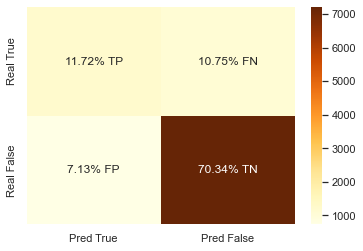

In [12]:
%%time
pred = nb_cont.predict(val_feat_r)
prob = nb_cont.predict_proba(val_feat_r)
score(val_targ_r,pred, prob)